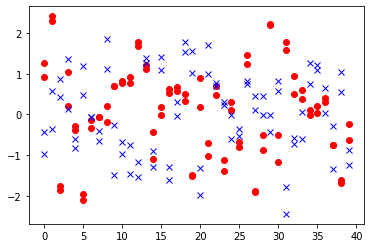

Epoch no.= 0  ,Accuracy= 0.475
Epoch no.= 10  ,Accuracy= 0.5375
Epoch no.= 20  ,Accuracy= 0.525
Epoch no.= 30  ,Accuracy= 0.525
Epoch no.= 40  ,Accuracy= 0.5125
Epoch no.= 50  ,Accuracy= 0.525
Epoch no.= 60  ,Accuracy= 0.525
Epoch no.= 70  ,Accuracy= 0.525
Epoch no.= 80  ,Accuracy= 0.525
Epoch no.= 90  ,Accuracy= 0.525
Epoch no.= 100  ,Accuracy= 0.525
Epoch no.= 110  ,Accuracy= 0.525
Epoch no.= 120  ,Accuracy= 0.525
Epoch no.= 130  ,Accuracy= 0.525
Epoch no.= 140  ,Accuracy= 0.525
Epoch no.= 150  ,Accuracy= 0.525
Epoch no.= 160  ,Accuracy= 0.525
Epoch no.= 170  ,Accuracy= 0.525
Epoch no.= 180  ,Accuracy= 0.525
Epoch no.= 190  ,Accuracy= 0.525
Epoch no.= 200  ,Accuracy= 0.525
Epoch no.= 210  ,Accuracy= 0.525
Epoch no.= 220  ,Accuracy= 0.525
Epoch no.= 230  ,Accuracy= 0.525
Epoch no.= 240  ,Accuracy= 0.525
Epoch no.= 250  ,Accuracy= 0.525
Epoch no.= 260  ,Accuracy= 0.525
Epoch no.= 270  ,Accuracy= 0.525
Epoch no.= 280  ,Accuracy= 0.525
Epoch no.= 290  ,Accuracy= 0.525
Epoch no.= 300  ,Ac

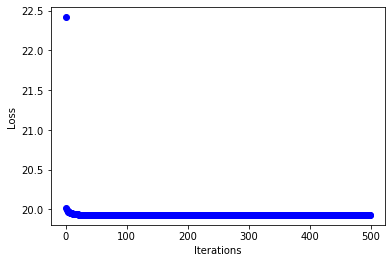

NameError: name 'bout' is not defined

In [2]:
# importing the library
import numpy as np
import matplotlib.pyplot as plt

def create_data(obs):
    h=obs//2
    # creating the input array
    class_zeros = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], h)
    class_ones = np.random.multivariate_normal([0,0], [[1.,.85],[.85,1.]], h)
    x = class_zeros
    x = np.append(x,class_ones).reshape(obs,2)
    plt.plot(class_zeros,'o',color='r')
    plt.plot(class_ones,'x',color='b')
    plt.show()

    # creating the output array
   
    y=np.zeros((h))
    y=np.append(y,np.ones((h))).reshape(obs,1)

    #print(y)
    return x,y

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

# defining the Sigmoid Function
def tanh (x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# derivative of Sigmoid Function
def derivatives_tanh(x):
    return (1 - x**2)

def accuracy(p,t):
    c=0
    for i in range(t.shape[0]):
        if(p[i]==t[i]):
            c += 1
    return c

def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

def cost(y_target, output):
    summ=np.sum((output-y_target)**2)
    return np.mean(summ)
       
def NeuralNetwork(x,y): # 2
    # initializing the variables
    epoch=500 # number of training iterations
    lr=0.1 # learning rate
    inputlayer_neurons = x.shape[1] # number of features in data set
    hiddenlayer_neurons =2 # number of hidden layers neurons
    output_neurons = 1 # number of neurons at output layer

    # initializing weight and bias
    wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
    #bh=np.random.uniform(size=(1,hiddenlayer_neurons))
    wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
    #bout=np.random.uniform(size=(1,output_neurons))

    # training the model
    for i in range(epoch):

        #Forward Propogation
        hidden_layer_input1=np.dot(x,wh)
        hidden_layer_input=hidden_layer_input1 #+ bh
        hiddenlayer_activations = tanh(hidden_layer_input)
        output_layer_input1=np.dot(hiddenlayer_activations,wout)
        output_layer_input= output_layer_input1 #+ bout
        output = sigmoid(output_layer_input)
        #print(output.shape)

        #Backpropagation
        E = y-output # error (t-a)
        slope_output_layer = derivatives_sigmoid(output) # derivation of sigmoid function = a(1-a)
        slope_hidden_layer = derivatives_tanh(hiddenlayer_activations) # derivation of tanh function = (1-a**2)
        d_output = E * slope_output_layer # (t-a) * a(1-a)
        Error_at_hidden_layer = d_output.dot(wout.T) # (t-a)*(a(1-a))*(wout)
        d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer # (t-a)*(a(1-a))*(wout)*((1-a**2))
        wout += hiddenlayer_activations.T.dot(d_output) *lr
        #bout += np.sum(d_output, axis=0,keepdims=True) *lr
        wh += x.T.dot(d_hiddenlayer) *lr
        #bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
       
        acc = accuracy(np.round(output),y)
        acc = acc/y.shape[0]
        if(i%10 == 0):
            print('Epoch no.=',i,' ,Accuracy=',acc)
        cost_p=cost(y,output)
        plt.plot(i,cost_p,'o',color='b')  
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    return wout,bout

train_data,train_t = create_data(80)
wout,bout=NeuralNetwork(train_data,train_t)
test,t = create_data(20)
hidden_layer_input1=np.dot(test,wh)
hidden_layer_input=hidden_layer_input1
hiddenlayer_activations = tanh(hidden_layer_input)
output_layer_input1=np.dot(hiddenlayer_activations,wout)
output_layer_input= output_layer_input1
output = sigmoid(output_layer_input)
acc = accuracy(np.round(output),t)
acc = acc / t.shape[0]
print('Accuracy=',acc) 